Derived from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html with slight modifications

# Fill Between and Alpha
The `fill_between` function penetrates a shaded region between a min and max boundary that is useful for illustrating ranges. It has a very handy `where` argument to combine filling with logical ranges, e.g., to just fill in a curve over some threshold value.

At its most basic level, `fill_between` can be used to enhance a graph's visual appearance. Let's compare two graphs of financial data with a simple line plot on the left and a filled line on the right.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np

!python --version
print(f'Matplotlib version: {mpl.__version__}')
print(f'Numpy version: {np.__version__}')

Python 3.8.18
Matplotlib version: 3.7.2
Numpy version: 1.24.3


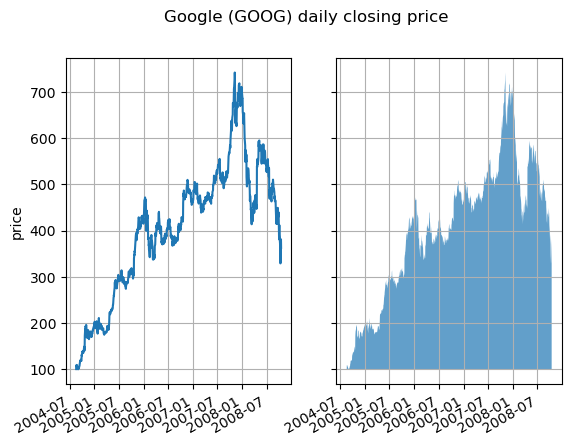

In [28]:
r = np.load(cbook.get_sample_data('goog.npz', asfileobj=False))['price_data']

fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)

ax[0].plot(r['date'], r['close'])
ax[0].set_ylabel('price')

ax[1].fill_between(r['date'], r['close'].min(), r['close'], alpha=0.7)

for a in ax: a.grid(True)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

plt.show()

The alpha channel is not necessary here, but it can be used to soften colors for more visually appealing plots. In other examples, as we'll se below, the alpha channel is functionally useful as the shaded regions can overlap and alpha allows you to see both. Note that the postscript format does not support alpha (this is a postscript limitation, not a matplotlib limitation), so when using alpha save your figures in PNG, PDF, or SVG.

Our next example computes two populations of random walkers with a different mean and standard deviation of the normal distributions from which the steps are drawn. We use filled regions to plot +/- one standard deviation of the mean position of the population. Here the alpha channel is useful, not just aesthetic.

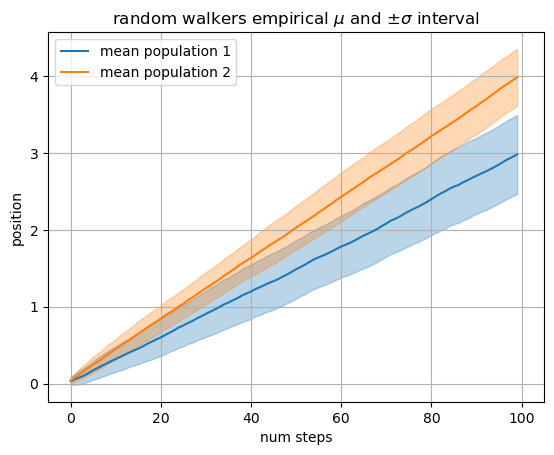

In [52]:
np.random.seed(0)
n = np.arange(0,100,1)
x1, x2 = 0.03 + 0.05 * np.random.randn(100, 200), 0.04 + 0.04 * np.random.randn(100, 200)
c1, c2 = x1.cumsum(axis=0), x2.cumsum(axis=0)
m1, m2 = c1.mean(axis=1), c2.mean(axis=1)
s1, s2 = c1.std(axis=1), c2.std(axis=1)


fig, ax = plt.subplots()

ax.plot(n, m1, color='tab:blue', label='mean population 1')
ax.fill_between(n, m1-s1, m1+s1, alpha=0.3, color='tab:blue')
ax.plot(n, m2, color='tab:orange', label='mean population 2')
ax.fill_between(n, m2-s2, m2+s2, alpha=0.3, color='tab:orange')

ax.legend()
ax.set(title='random walkers empirical $\mu$ and $\pm\sigma$ interval', ylabel='position', xlabel='num steps', xlim=(-5,105))
ax.grid(True)

The `where` keyword argument is very handy for highlighting certain regions of the graph. `where` takes a boolean mask the same length as the x, ymin, and ymax arguments, and only fills in the region where the boolean mask is True. In the example below, we simulate a single random walker and compute the analytic mean and standard deviation of the population positions. The population mean is shown as the dashed line, and the plus/minus one sigma deviation from the mean is shown as the filled region. We use the where mask `X > upper_bound` to find the region where the walker is outside the one sigma boundary, and shade that region red.

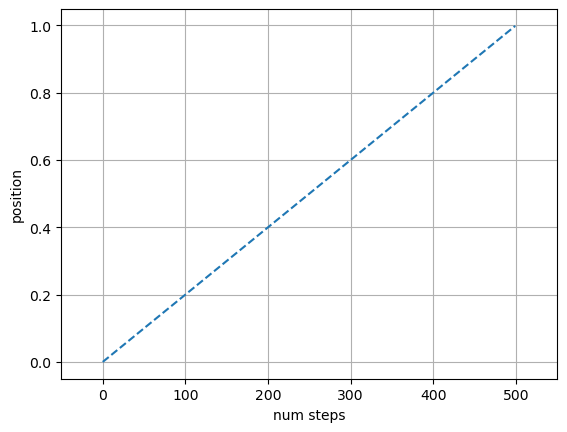

In [73]:
np.random.seed(0)

t = 500
n = 500

mu = 0.002
sigma = 0.01

xx = np.arange(t)
d = mu + sigma * np.random.randn(t)
c = d.cumsum()
# m = c.mean(axis=1)
# s = c.std(axis=1)

# md = m + s * np.random.randn(t)

lb = mu * xx - np.square(xx) * sigma
ub = mu * xx + np.square(xx) * sigma


fig, ax = plt.subplots()

# mean & fill between
ax.plot(xx, mu*xx, color='tab:blue', label='population mean', ls='--')
ax.fill_between(xx, lb, ub, alpha=0.4, color='tab:blue', label='1 sigma range')

# the graphs
# ax.plot(xx, c, color='tab:blue', lw=2)
# ax.fill_between(xx, ub, c, color='tab:red', alpha=0.4)



ax.set(ylabel='position', xlabel='num steps', xlim=(-50,550))
ax.grid(True)


plt.show()

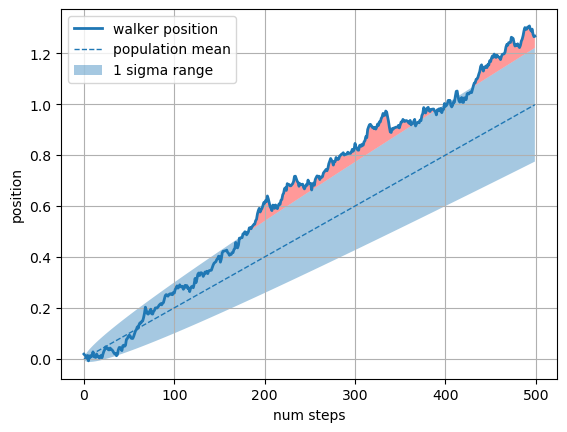

In [74]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4,
                label='1 sigma range')
ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
ax.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

In [42]:
y.std(axis=1)

array([0.9075319 , 1.77544413, 2.52399686])